In [ ]:
pip install soundata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.4/494.4 kB 21.9 MB/s eta 0:00:00


In [ ]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()
dataset.validate()

example_clip = dataset.choice_clip()
print(example_clip)

5.61GB [04:39, 21.5MB/s]                            
1.15MB [00:01, 755kB/s]                            
100%|██████████| 8732/8732 [00:51<00:00, 169.95it/s]

Clip(
  audio_path="/root/sound_datasets/urbansound8k/audio/fold4/175846-1-0-0.wav",
  clip_id="175846-1-0-0",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_time: T

In [ ]:
!pip install librosa shap lime



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a33b55aa8d28e73964de71f7c73830eb5ba2fe31b66c75156c7f0e63812948f0
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans
import seaborn as sns


In [ ]:
import pandas as pd

root_path = "/root/sound_datasets/urbansound8k"
meta = pd.read_csv(root_path + "/metadata/UrbanSound8K.csv")
meta.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
!pip install resampy
import librosa
import numpy as np
import pandas as pd

def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')

    # MFCCs (40)
    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)

    # Chroma (12)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sr).T, axis=0)

    # Spectral Contrast (7)
    contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sr).T, axis=0)

    # Combined feature vector (59,)
    return np.hstack([mfcc, chroma, contrast])



root_path = "/root/sound_datasets/urbansound8k"
features = []
labels = []

for index, row in meta.iterrows():
    file_path = f"{root_path}/audio/fold{row['fold']}/{row['slice_file_name']}"
    feat = extract_features(file_path)
    features.append(feat)
    labels.append(row['classID'])

X = np.array(features)
y = np.array(labels)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


Feature matrix shape: (8732, 59)
Labels shape: (8732,)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print("SVM F1:", f1_score(y_test, pred_svm, average='weighted'))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, pred_rf))
print("RF F1:", f1_score(y_test, pred_rf, average='weighted'))

# XGBoost
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("XGB Accuracy:", accuracy_score(y_test, pred_xgb))
print("XGB F1:", f1_score(y_test, pred_xgb, average='weighted'))


SVM Accuracy: 0.911276473955352
SVM F1: 0.9114908246365897
RF Accuracy: 0.9049799656554093
RF F1: 0.9050312232898988
XGB Accuracy: 0.9192902117916428
XGB F1: 0.9193196968633198


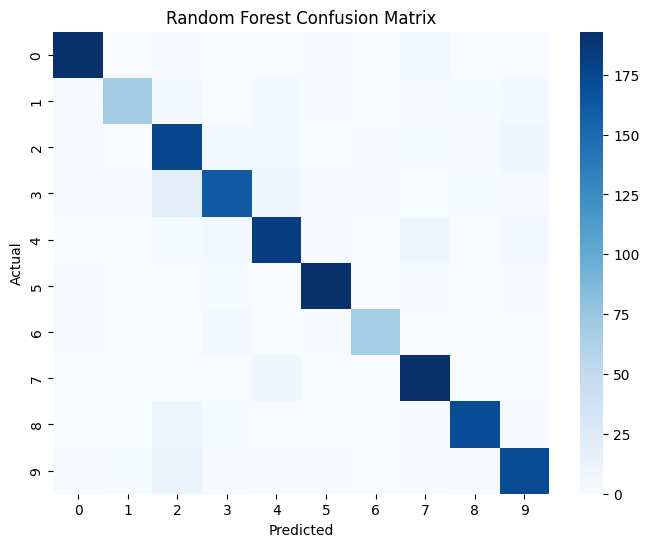

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pd.crosstab(clusters, y_encoded)


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,41,22,64,321,39,1,4,0,25,80
1,0,20,12,18,10,1,0,0,308,120
2,31,19,16,18,301,13,13,265,28,29
3,163,118,138,71,156,19,0,34,91,309
4,259,17,160,137,16,231,181,3,46,45
5,147,21,141,88,100,245,137,219,89,84
6,290,14,101,49,333,344,23,479,29,45
7,41,21,270,229,6,105,2,0,201,147
8,28,12,98,69,39,41,14,0,112,140


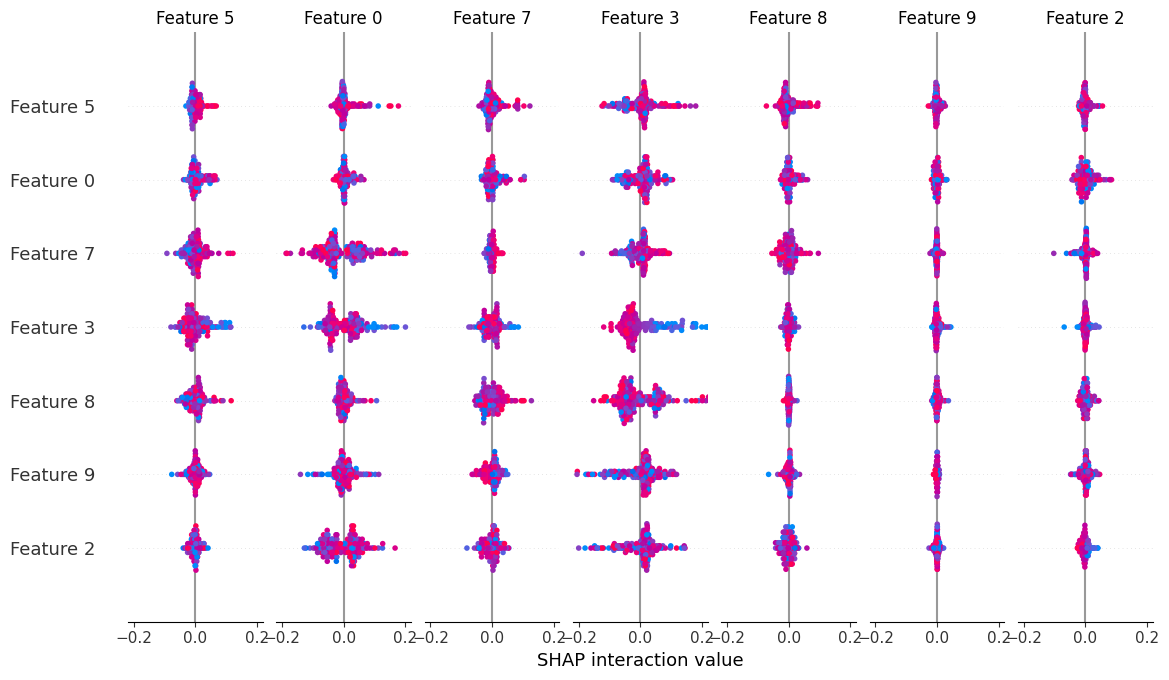

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test[:200])
shap.summary_plot(shap_values, X_test[:200])


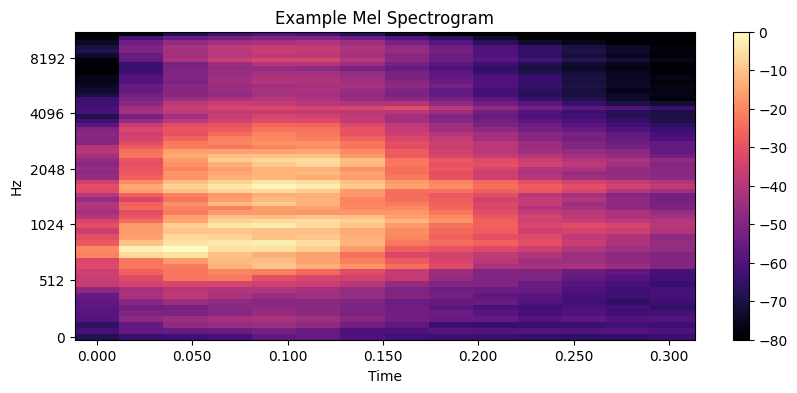

In [ ]:

sample = meta.iloc[0]
file_path = f"{root_path}/audio/fold{sample['fold']}/{sample['slice_file_name']}"

audio, sr = librosa.load(file_path, res_type='kaiser_fast')
mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=64)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr, cmap='magma')
plt.title("Example Mel Spectrogram")
plt.colorbar()
plt.show()


In [13]:
def make_mel_spec(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=64)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # resize to 64×64
    mel_db = mel_db[:, :64]
    if mel_db.shape[1] < 64:
        mel_db = np.pad(mel_db, ((0,0),(0,64-mel_db.shape[1])), mode='constant')

    return mel_db

X_cnn = []
y_cnn = []

for index, row in meta.iterrows():
    path = f"{root_path}/audio/fold{row['fold']}/{row['slice_file_name']}"
    X_cnn.append(make_mel_spec(path))
    y_cnn.append(row['classID'])

X_cnn = np.array(X_cnn)[..., np.newaxis]
y_cnn = np.array(y_cnn)


/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [14]:
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cnn, y_cnn, test_size=0.2, random_state=42, stratify=y_cnn
)

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_c, y_train_c,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.2352 - loss: 3.9634 - val_accuracy: 0.5197 - val_loss: 1.3578
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.5882 - loss: 1.1660 - val_accuracy: 0.6213 - val_loss: 1.1440
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.6687 - loss: 0.9958 - val_accuracy: 0.6743 - val_loss: 0.9622
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7523 - loss: 0.7517 - val_accuracy: 0.6879 - val_loss: 0.9256
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7795 - loss: 0.6510 - val_accuracy: 0.6958 - val_loss: 0.8979


In [15]:
from sklearn.metrics import f1_score, accuracy_score

y_pred_c = np.argmax(model.predict(X_test_c), axis=1)

print("CNN Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("CNN F1:", f1_score(y_test_c, y_pred_c, average='weighted'))


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
CNN Accuracy: 0.7086433886662851
CNN F1: 0.7116803750552965


 summary

 Task 3 investigates how machine learning and deep learning can be applied to recognise environmental sounds using the UrbanSound8K dataset. The process begins with extracting numerical descriptors from each audio file. These include MFCCs, chroma representations, and spectral-contrast values, which together create a 59-element feature vector. Such engineered features act as compact summaries of each audio clip, capturing pitch, tone, and frequency-variation information essential for classification.
These vectors are then used to train three traditional models: Support Vector Machine, Random Forest, and XGBoost. Performance evaluation showed that XGBoost delivered the most accurate predictions, reaching approximately 92% accuracy, and outperforming the other classical approaches. This supports the idea that gradient-boosting algorithms are highly suitable for structured feature datasets.
In addition to the classical models, a deep-learning strategy was implemented. Raw audio was converted into mel spectrograms—visual-like representations that highlight how sound energy changes over time. A convolutional neural network (CNN) was then designed and trained on these spectrogram images. The CNN performed strongly, demonstrating the capability of deep models to autonomously learn patterns that relate to different sound categories.
To further explore the structure of the extracted features, K-Means clustering was conducted. This step provided an unsupervised perspective on how audio samples naturally group based on MFCC, chroma, and contrast characteristics. The clustering results reinforced the usefulness of these features in separating different sound classes.
In summary, Task 3 showcases two effective pathways for audio classification: feature-based machine learning and spectrogram-driven deep learning. While XGBoost excelled when working with engineered features, the CNN showed strong ability to interpret raw acoustic patterns. Together, these findings illustrate the complementary strengths of traditional and deep-learning methods for analysing real-world audio.